In [1]:
link = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

In [135]:
# Bibliotecas

# Tratamento de dados
import pandas as pd
import numpy as np


# gráficos
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
import matplotlib.pyplot as plt

# Transformação dos dados
from sklearn.preprocessing import StandardScaler


# aprodizado de maquina
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

![texto do link](https://i.ytimg.com/vi/A6zbFVqCeO8/maxresdefault.jpg)

In [3]:
passageiros = pd.read_csv(link)

In [4]:
passageiros

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


<Axes: xlabel='tempo', ylabel='passageiros'>

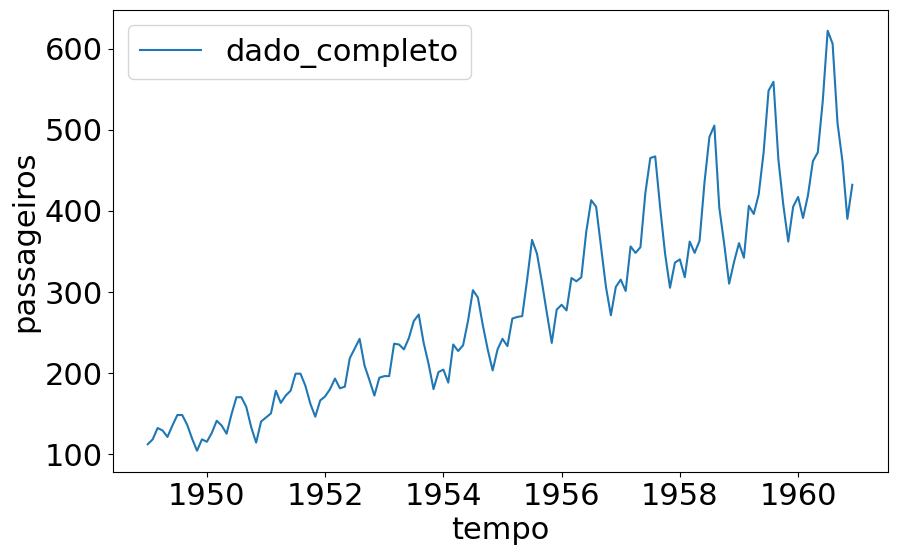

In [5]:
sns.lineplot(x='tempo', y='passageiros',data=passageiros, label='dado_completo')

In [6]:
# Normalizando os dados, escalidade

sc = StandardScaler()

# ajuste aos dados
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
dado_escalado[:5]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593]])

In [9]:
# primeira coluna vai ser o x
x = dado_escalado[:,0]

# a segunda coluna vai ser o y
y = dado_escalado[:,1]

![texto do link](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_cGcnxK25jz486XL2VQTC8yHsxlB3ubrRav_ZtptV-Apc7NWIU6PydOUTruBgX2xy-Fc&usqp=CAU)

Text(0.5, 0, 'Data')

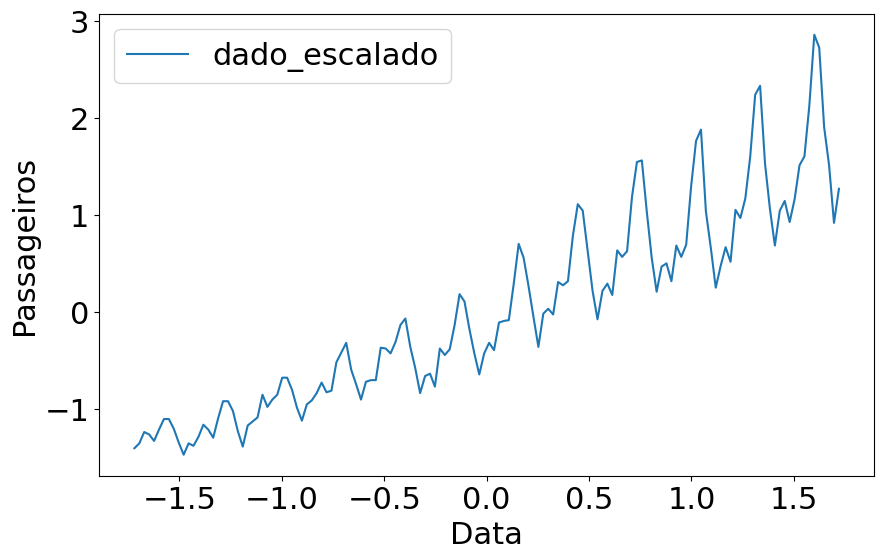

In [10]:
sns.lineplot(x=x,y=y,label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [11]:
# 90% de treino
tamanho_treino = int(len(passageiros) * 0.9)
# 10% de teste
tamanho_teste = len(passageiros) - tamanho_treino

print(tamanho_treino, tamanho_teste)

129 15


In [12]:
# limitando a quantidade de linha para treino e teste do x e y
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [13]:
xteste = x[tamanho_treino : len(passageiros)]
yteste = y[tamanho_treino : len(passageiros)]

Text(0.5, 0, 'Data')

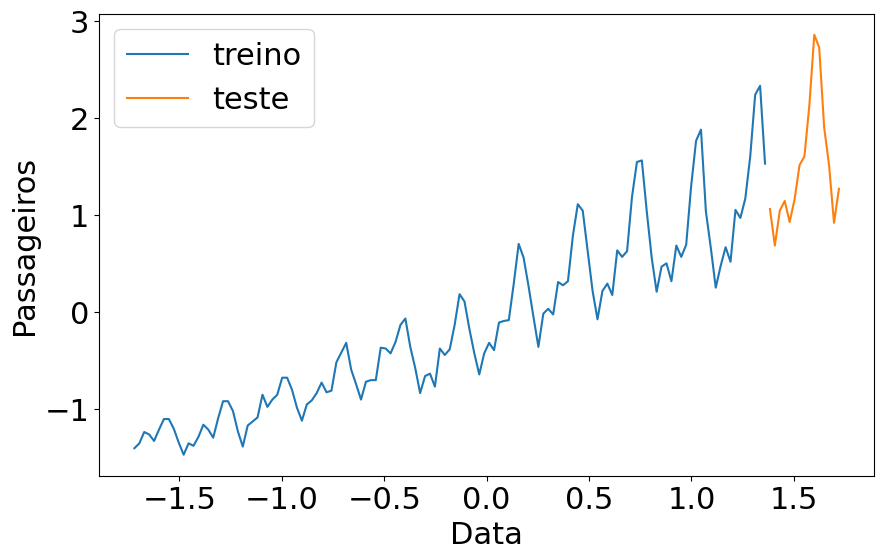

In [14]:
sns.lineplot(x = xtreino, y = ytreino, label='treino')
sns.lineplot(x = xteste, y = yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Regressão Linear

usando o modelo de redes neurais para analise de regressão


![texto do link](https://miro.medium.com/v2/resize:fit:1400/0*TIMO9gCTNEJ7AF-m.jpg)

In [15]:
regressor = Sequential()

In [16]:

# use_bias é o b de y = x.a + b é o bias
# kernel_initializer inicializando os pesos com uns
regressor.add(
        Dense(1, input_dim = 1, kernel_initializer = 'Ones', use_bias = True, activation='linear')

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
regressor.compile(loss='mean_squared_error', optimizer = 'adam')
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
regressor.fit(xtreino,ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1293


In [19]:
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


<Axes: >

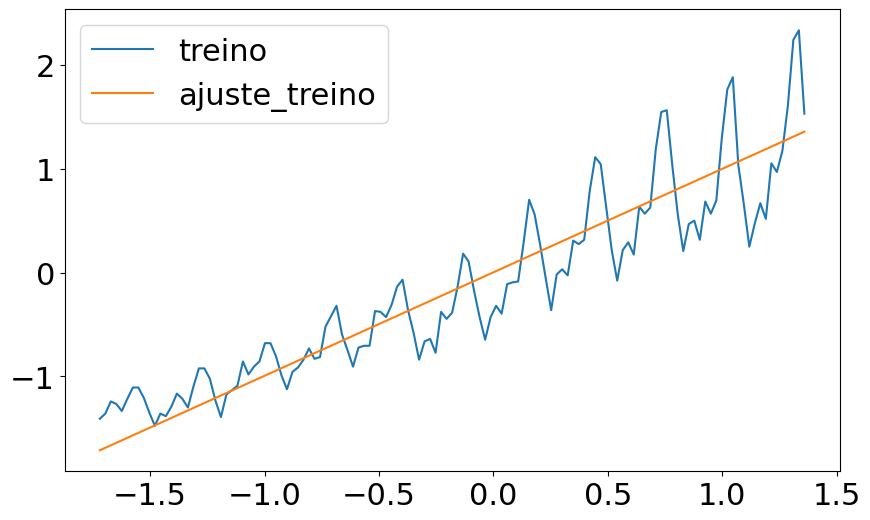

In [20]:
sns.lineplot(x = xtreino, y = ytreino,label = 'treino')
sns.lineplot(x = xtreino, y = y_predict[:,0], label = 'ajuste_treino')

In [21]:
d = {'tempo': xtreino, 'passageiros':y_predict[:,0]}

In [22]:
resultados = pd.DataFrame(d)

In [23]:
resultados

,tempo,passageiros
0,-1.720064,-1.710685
1,-1.696007,-1.686733
2,-1.671950,-1.662780
3,-1.647894,-1.638828
4,-1.623837,-1.614876
...,...,...
124,1.262984,1.259393
125,1.287041,1.283346
126,1.311098,1.307298
127,1.335155,1.331250


In [24]:
# transformando os dados o inverso, trazendo os dados originais de xtreino

resultado_transf = sc.inverse_transform(resultados)

In [25]:
resultado_transf = pd.DataFrame(resultado_transf)

In [26]:
resultado_transf.columns = ['tempo','passageiros']

In [27]:
resultado_transf

,tempo,passageiros
0,1949.000000,75.787886
1,1949.083333,78.651340
2,1949.166667,81.514822
3,1949.250000,84.378276
4,1949.333333,87.241758
...,...,...
124,1959.333333,430.857877
125,1959.416667,433.721345
126,1959.500000,436.584813
127,1959.583333,439.448267


<Axes: xlabel='tempo', ylabel='passageiros'>

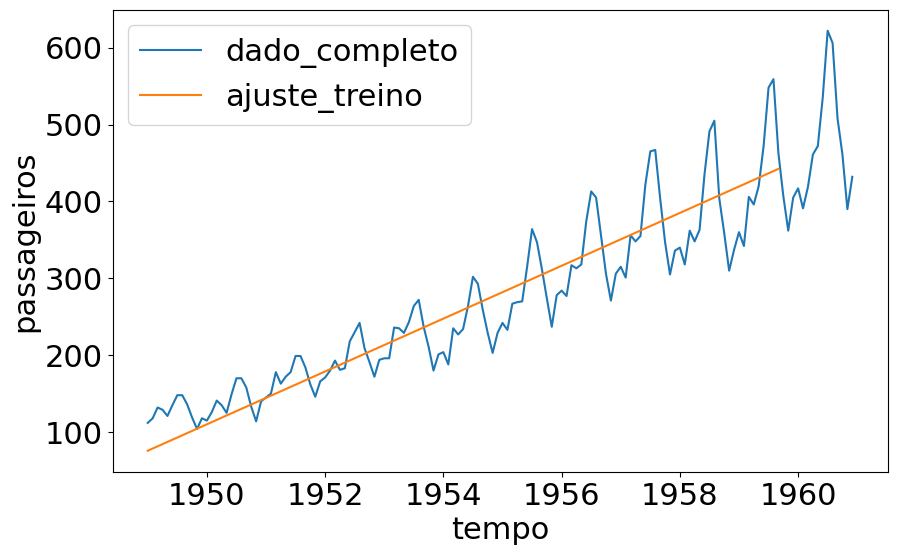

In [28]:
sns.lineplot(x='tempo',y = 'passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y = 'passageiros', data = resultado_transf, label='ajuste_treino')

In [29]:
y_predict_teste = regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [30]:
d = {'tempo':xteste,'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(d)
resultados_teste

,tempo,passageiros
0,1.383268,1.379154
1,1.407325,1.403107
2,1.431382,1.427059
3,1.455439,1.451011
4,1.479496,1.474964
5,1.503553,1.498916
6,1.527609,1.522868
7,1.551666,1.546820
8,1.575723,1.570772
9,1.599780,1.594725


In [31]:
# transformando os dados o inverso, trazendo os dados originais de xteste

resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']
resultado_transf_teste

,tempo,passageiros
0,1959.750000,445.175203
1,1959.833333,448.038685
2,1959.916667,450.902139
3,1960.000000,453.765607
4,1960.083333,456.629089
5,1960.166667,459.492543
6,1960.250000,462.356025
7,1960.333333,465.219479
8,1960.416667,468.082947
9,1960.500000,470.946415


<Axes: xlabel='tempo', ylabel='passageiros'>

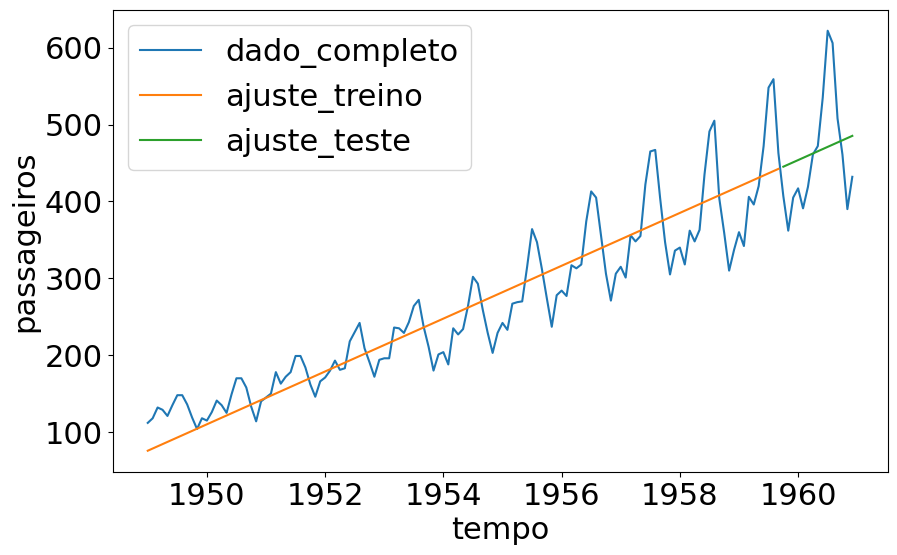

In [32]:
sns.lineplot(x='tempo',y = 'passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y = 'passageiros', data = resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo',y = 'passageiros', data = resultado_transf_teste, label='ajuste_teste')

Adicionando mais camada como:
- camada intermediaria
- camada de saída

![imagens](https://www.biologix.com.br/wp-content/uploads/2024/07/rede-neural-artificial-camadas-percepcao-1024x595.png)

In [33]:
regressor2 = Sequential()

In [34]:
# iniciando os pesos aleatorios
regressor2.add(Dense(8,input_dim = 1, kernel_initializer='random_uniform', activation = 'linear', use_bias=False))
regressor2.add(Dense(8,kernel_initializer = 'random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(1, kernel_initializer = 'random_uniform', activation='linear', use_bias=False))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [36]:
regressor2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
regressor2.fit(xtreino,ytreino, epochs = 200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7571
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8161  
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7565  
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8523 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7965 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8899 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8276  
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7779  
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8408  
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7430 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7244  
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7296  
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7807 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6974  
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7090  
Epoch 16/20

In [38]:
y_predict2 = regressor2.predict(xtreino)
y_predict2_teste = regressor2.predict(xteste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<Axes: >

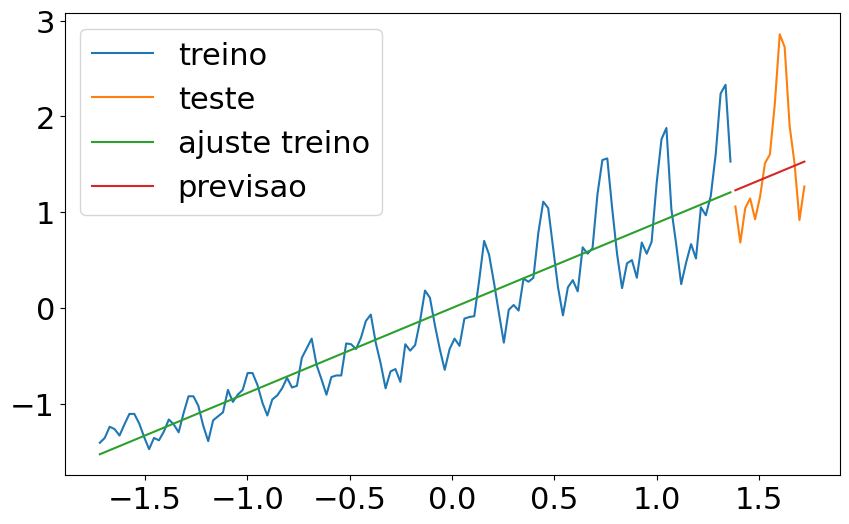

In [39]:
sns.lineplot(x = xtreino,   y = ytreino,              label ='treino')
sns.lineplot(x = xteste,    y = yteste,               label ='teste')
sns.lineplot(x = xtreino,   y = y_predict2[:,0],      label ='ajuste treino')
sns.lineplot(x = xteste,    y = y_predict2_teste[:,0],label ='previsao')

Definindo as funções de ativações com sigmoid

In [40]:
regressor3 = Sequential()

# iniciando os pesos aleatorios
regressor3.add(Dense(8,input_dim = 1, kernel_initializer='random_uniform', activation = 'sigmoid', use_bias=False))
regressor3.add(Dense(8,kernel_initializer = 'random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer = 'random_uniform', activation='linear', use_bias=False))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [42]:
regressor3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
regressor3.fit(xtreino,ytreino, epochs = 500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7722  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7674 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8725 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7885 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8147 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7839 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8182 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7925 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8326 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7815 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7727 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7601 
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7238 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7171 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7726 
Epoch 16/500
5/5 ━

In [44]:
y_predict3 = regressor3.predict(xtreino)
y_predict3_teste = regressor3.predict(xteste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


<Axes: >

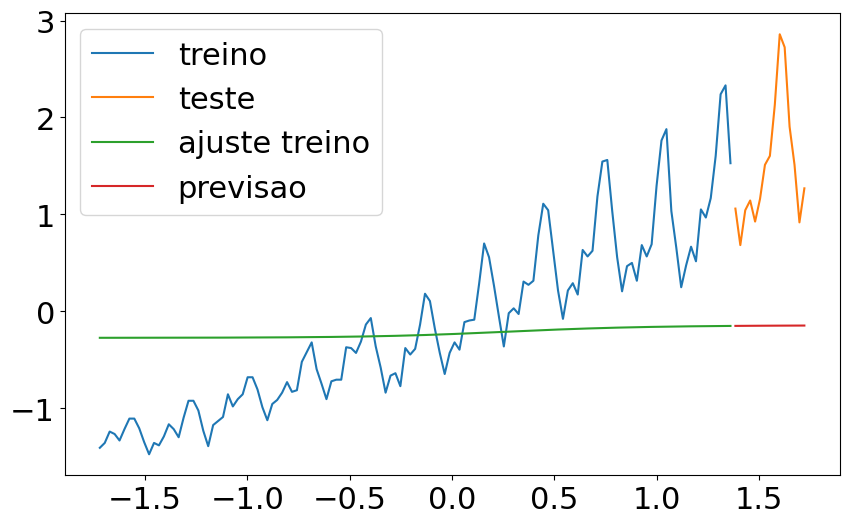

In [45]:
sns.lineplot(x = xtreino,   y = ytreino,              label ='treino')
sns.lineplot(x = xteste,    y = yteste,               label ='teste')
sns.lineplot(x = xtreino,   y = y_predict3[:,0],      label ='ajuste treino')
sns.lineplot(x = xteste,    y = y_predict3_teste[:,0],label ='previsao')

In [46]:
def separa_dados(vetor, n_passos):

    """
        Entrada: vetor n´´umero  de passageiros
              n_passos: número de passos no regressor

        Saída:
              X_novo: Array 2D
              y_novo: Array 1D - Nosso alvo
    """
    # Inicializa duas listas vazias: uma para armazenar os dados de entrada (X_novo)
    # e outra para armazenar as saídas correspondentes (y_novo)
    X_novo, y_novo = [], []

    # Loop através do vetor, começando no índice `n_passos` até o final do vetor
    for i in range(n_passos, vetor.shape[0]):
        # Para cada posição `i`, cria uma subsequência de `n_passos` elementos anteriores
        # e adiciona essa subsequência à lista de entradas (X_novo)
        X_novo.append(list(vetor.loc[i - n_passos:i - 1]))

        # O valor correspondente à posição atual `i` é adicionado à lista de saídas (y_novo)
        y_novo.append(vetor.loc[i])

    # Converte as listas de entradas e saídas em arrays numpy para facilitar o uso em modelos de ML
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)

    # Retorna os arrays com os dados de entrada e saída
    return X_novo, y_novo


In [47]:
vetor = pd.DataFrame(ytreino)[0]

In [48]:
vetor

,0
0,-1.407779
1,-1.357590
2,-1.240483
3,-1.265578
4,-1.332496
...,...
124,1.168570
125,1.603538
126,2.239260
127,2.331272


dados de treino

In [49]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [50]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [51]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [52]:
vetor2 = pd.DataFrame(yteste)[0]

In [53]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [54]:
regressor4 = Sequential()

regressor4.add(Dense(8, input_dim = 1, kernel_initializer = 'ones',activation = 'linear', use_bias = False)) # camada de entrada
regressor4.add(Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False)) # camada intermediaria
regressor4.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)) # camada de saída

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
regressor4.compile(loss='mean_squared_error', optimizer = 'adam')

In [56]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs = 100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8583
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7017  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8078 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6698  
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7255  
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7295 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6299 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6459 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5675 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5516 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5343 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4686 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4954 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4414 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3839 
Epoch 16/100
4/4 

In [57]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<Axes: xlabel='tempo', ylabel='0'>

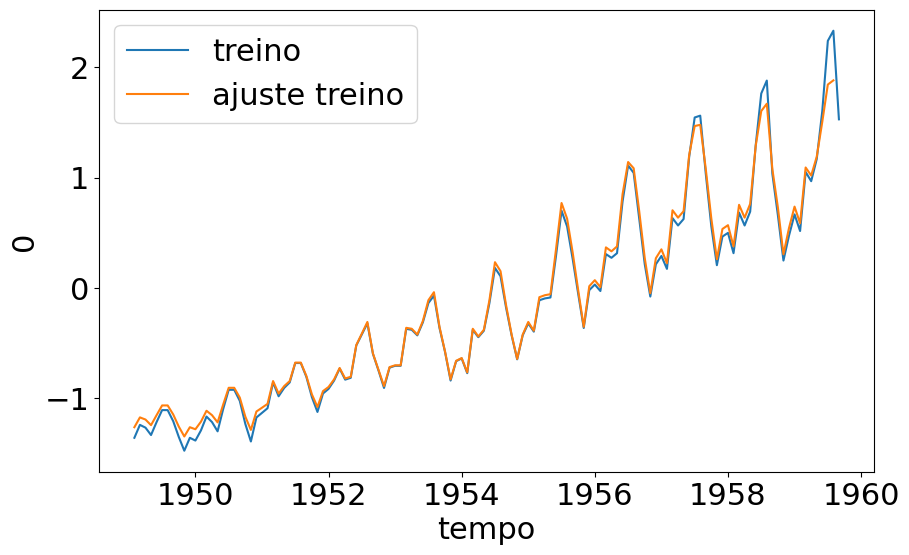

In [58]:
sns.lineplot(x =  'tempo', y = ytreino_novo, data = passageiros[1:129], label='treino')
sns.lineplot(x =  'tempo', y = pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label='ajuste treino')

dados de teste

In [59]:
y_predict_teste_novo  =  regressor4.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


<Axes: xlabel='tempo', ylabel='0'>

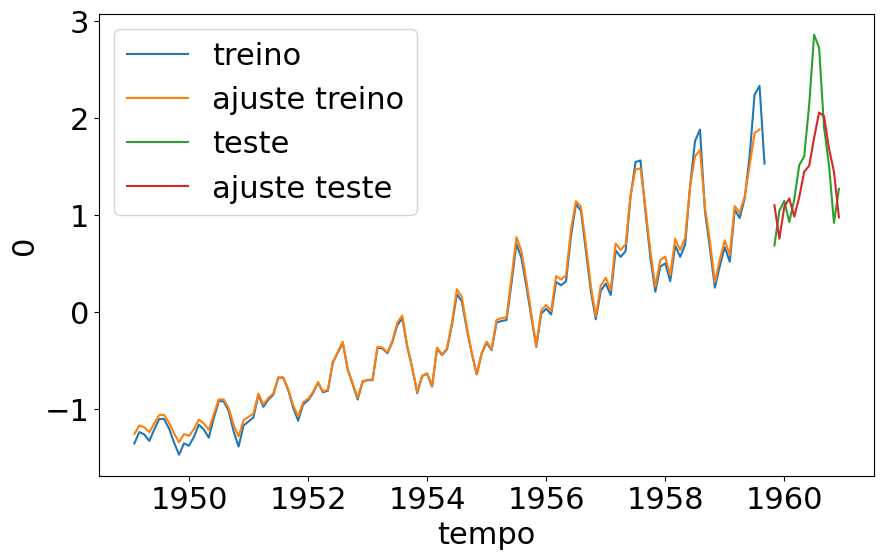

In [60]:
sns.lineplot(x =  'tempo', y = ytreino_novo, data = passageiros[1:129], label='treino')
sns.lineplot(x =  'tempo', y = pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label='ajuste treino')
sns.lineplot(x =  'tempo', y = yteste_novo, data = passageiros[130:144], label='teste')
sns.lineplot(x =  'tempo', y = pd.DataFrame(y_predict_teste_novo)[0].values, data = passageiros[130:144], label='ajuste teste')

In [61]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [62]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [63]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [64]:
regressor5 = Sequential()

In [65]:
regressor5.add(Dense(8, input_dim = 4, kernel_initializer = 'ones',activation = 'linear', use_bias = False)) # camada de entrada
regressor5.add(Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False)) # camada intermediaria
regressor5.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)) # camada de saída

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
regressor5.compile(loss='mean_squared_error', optimizer = 'adam')

In [67]:
regressor5.fit(xtreino_novo, ytreino_novo, epochs = 300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7936  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6645 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5807 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5646 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4768 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4567 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3612 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3083 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2595 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2271 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1948 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1658 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1538 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1403 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1427 
Epoch 16/300
4/4 ━

In [68]:
y_predict_teste_novo = regressor5.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [69]:
y_predict_novo = regressor5.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [70]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [71]:
resultado_teste = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

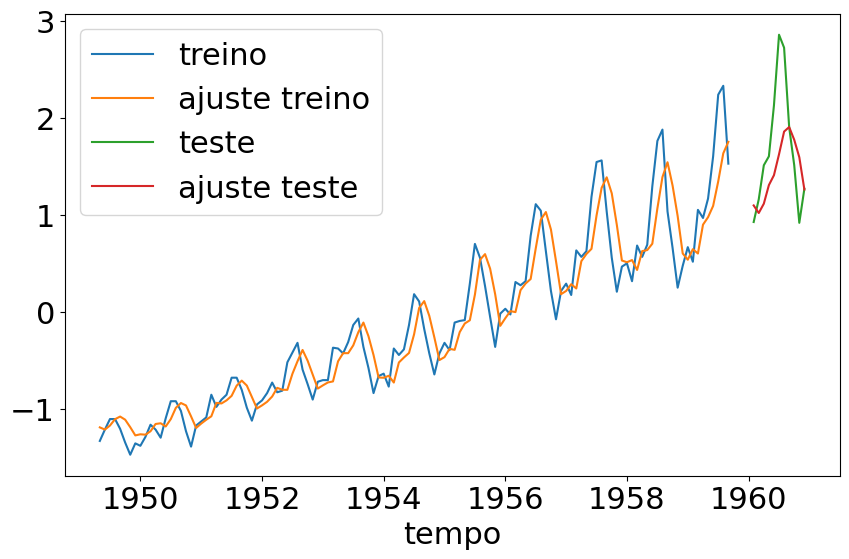

In [72]:
sns.lineplot(x = 'tempo',  y = ytreino_novo,            data = passageiros[4:129],   label = 'treino')
sns.lineplot(x = 'tempo',  y = resultado_treino.values, data = passageiros[4:129],   label = 'ajuste treino')
sns.lineplot(x = 'tempo',  y = yteste_novo,             data = passageiros[133:144], label = 'teste')
sns.lineplot(x = 'tempo',  y = resultado_teste.values,  data = passageiros[133:144], label = 'ajuste teste')

Segunda base de dados

In [73]:
link = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'

In [74]:
bike  = pd.read_csv(link)

In [75]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [76]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

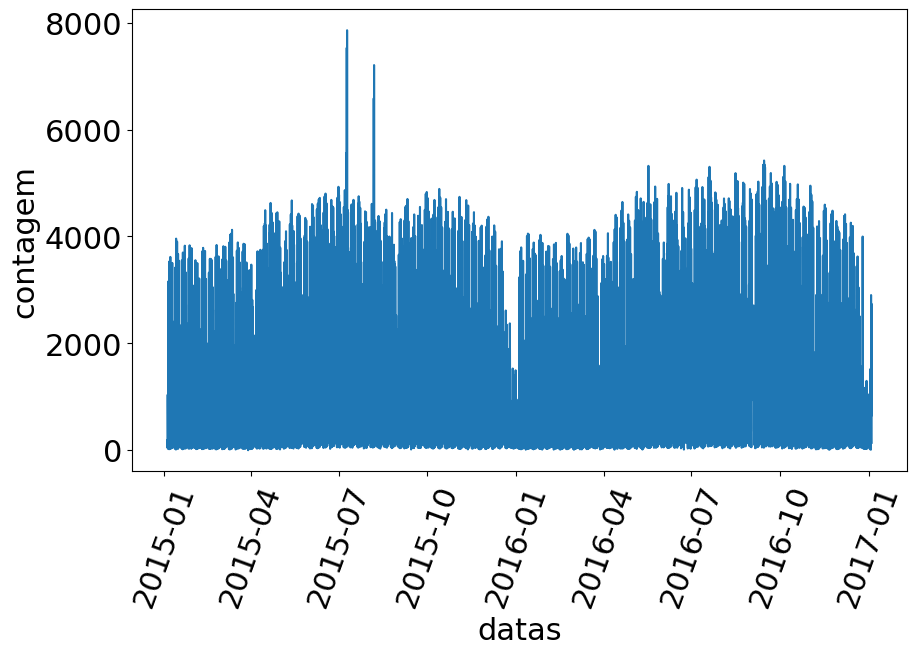

In [77]:
# gerar gráficos de dataspor contagem
sns.lineplot(x = 'datas', y = 'contagem', data = bike)
plt.xticks(rotation=70)

In [78]:
# escalecionando os dados
sc2 = StandardScaler()

In [79]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [95]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [96]:
tamanho_treino = int(len(bike) * 0.9) # gerando um valor 90% da quantidade total.
tamanho_teste = len(bike) - tamanho_treino

In [97]:
# dados de treino iniciando do início até 90%
ytreino = y[0:tamanho_treino]

In [98]:
 # dados de teste iniciando depois de 90% até o ultimo
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

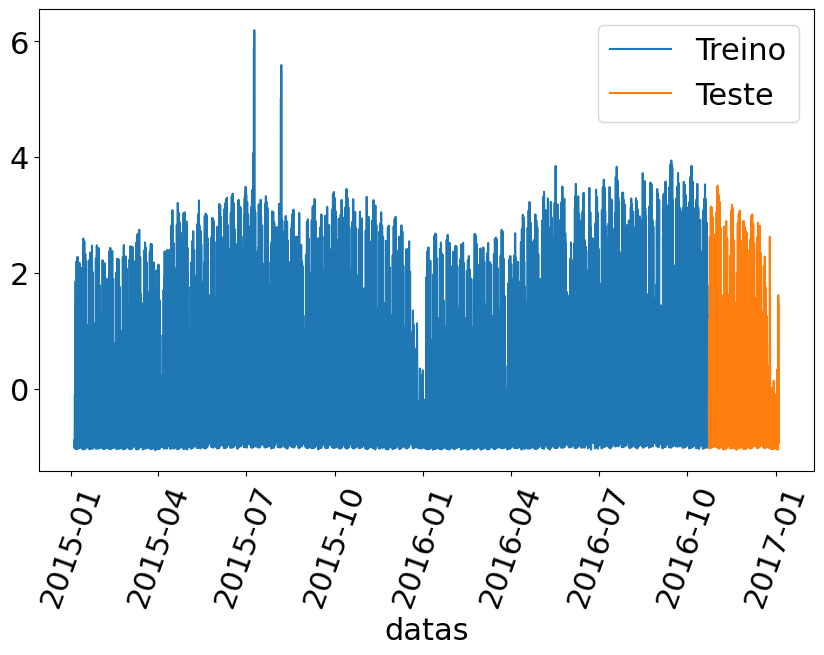

In [99]:
# gerando o gráfico
# ytreino[:,0] coluna de data
# obs. os dados já estão transformados
# pegando somente os dados de treino bike[0:tamanho_treino]

sns.lineplot(x = 'datas', y = ytreino[:,0], data = bike[0 : tamanho_treino], label = 'Treino')
sns.lineplot(x = 'datas', y = yteste[:,0], data = bike[tamanho_treino : len(bike)], label = 'Teste')
plt.xticks(rotation=70) # rotação da legenda de x

In [116]:
vetor = pd.DataFrame(ytreino)[0]

In [118]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [119]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [120]:
xtreino_novo = xtreino_novo.reshape(xtreino_novo.shape[0],xtreino_novo.shape[1],1)

In [121]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [122]:
recorrente = Sequential()

In [123]:
# tipo de rede recorrente LSTM ele recebe a quantidade de loop
recorrente.add(LSTM(128, input_shape = (xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units = 1))

recorrente.compile(loss ='mean_squared_error', optimizer = 'RMSProp')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
recorrente.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
# resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data = (xteste_novo, yteste_novo), epochs = 100) coloquei 30 número de epochs pelo fato da demora
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data = (xteste_novo, yteste_novo), epochs = 30)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.4937 - val_loss: 0.1251
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0963 - val_loss: 0.0516
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.0610 - val_loss: 0.0389
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 0.0571 - val_loss: 0.0333
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0433 - val_loss: 0.0281
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.0397 - val_loss: 0.0261
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 0.0360 - val_loss: 0.0209
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0347 - val_loss: 0.0220
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0351 - val_loss: 0.0230
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0355 - val_loss: 0.0277
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0335 - val_loss: 0.0260
Epoch 12/100
490/490

In [128]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

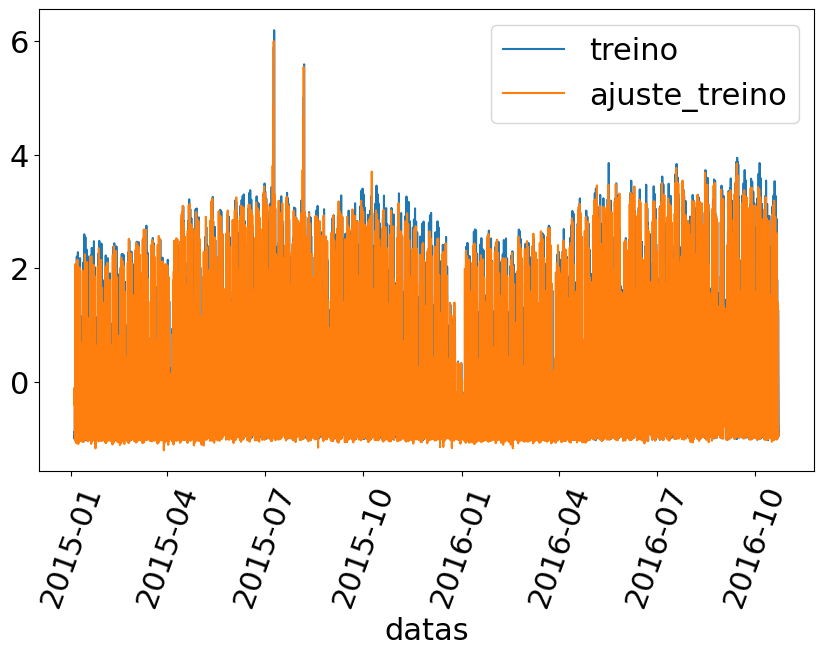

In [129]:
sns.lineplot(x = 'datas', y = ytreino[:,0], data= bike[0:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas', y = y_ajustado[:,0], data = bike[0:15662], label = 'ajuste_treino')
plt.xticks(rotation = 70)

In [130]:
y_predito = recorrente.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Axes: xlabel='datas'>

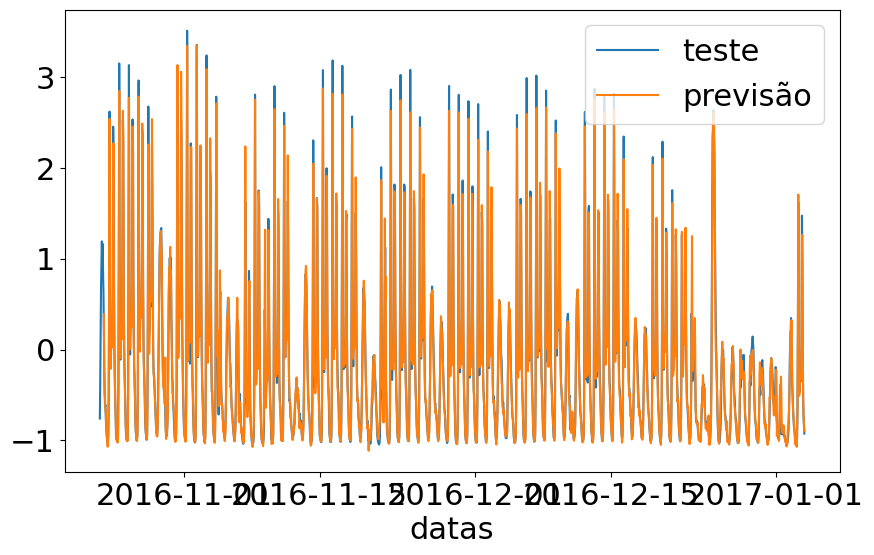

In [131]:
sns.lineplot(x = 'datas', y = yteste[:,0], data = bike[tamanho_treino:len(bike)], label = 'teste')
sns.lineplot(x = 'datas', y = y_predito[:,0], data = bike[tamanho_treino+10 :len(bike)], label = 'previsão')

usando GRU

In [136]:
recorrente_g = Sequential()

In [137]:
recorrente_g.add(GRU(128, input_shape = (xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [141]:
recorrente_g.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [142]:
recorrente.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,380 (521.02 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,691 (260.52 KB)

In [143]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data = (xteste_novo, yteste_novo), epochs = 30)

Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.4211 - val_loss: 0.0729
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0850 - val_loss: 0.0418
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0558 - val_loss: 0.0349
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0479 - val_loss: 0.0269
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0434 - val_loss: 0.0275
Epoch 6/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0368 - val_loss: 0.0249
Epoch 7/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0342 - val_loss: 0.0192
Epoch 8/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0339 - val_loss: 0.0192
Epoch 9/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0317 - val_loss: 0.0198
Epoch 10/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0306 - val_loss: 0.0177
Epoch 11/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0322 - val_loss: 0.0225
Epoch 12/30
490/490 ━━━━━━━━━━━━━━

In [144]:
y_predict2 = recorrente_g.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

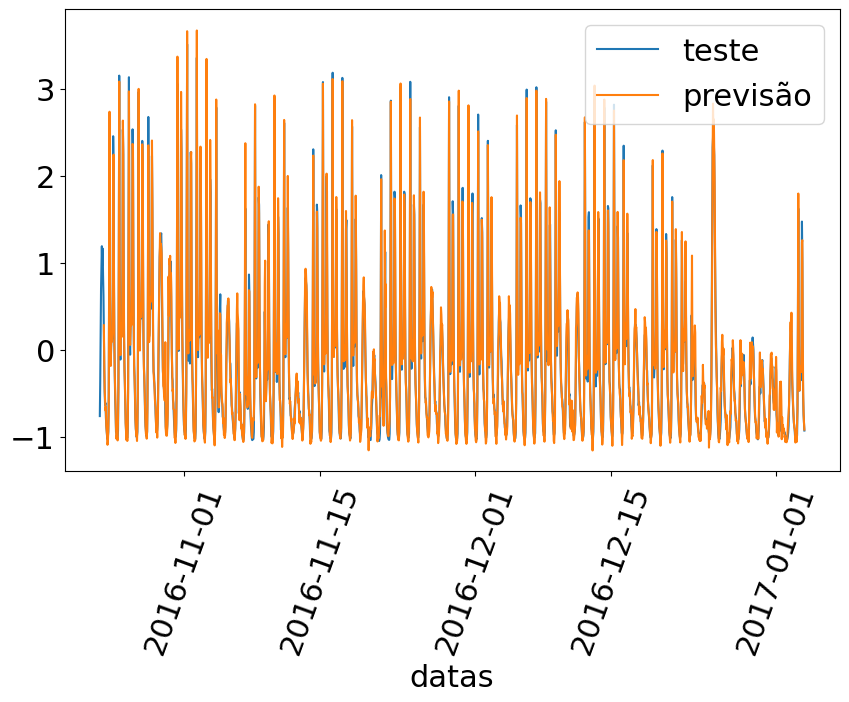

In [145]:
sns.lineplot(x = 'datas', y = yteste[:,0],     data = bike[tamanho_treino:len(bike)], label = 'teste')
sns.lineplot(x = 'datas', y = y_predict2[:,0], data = bike[tamanho_treino+10:len(bike)], label = 'previsão')
plt.xticks(rotation=70)

In [146]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

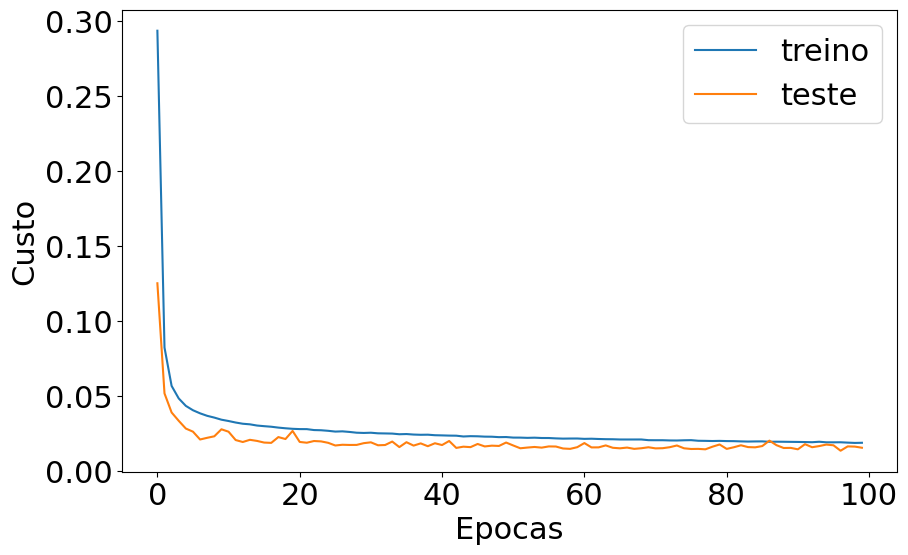

In [148]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

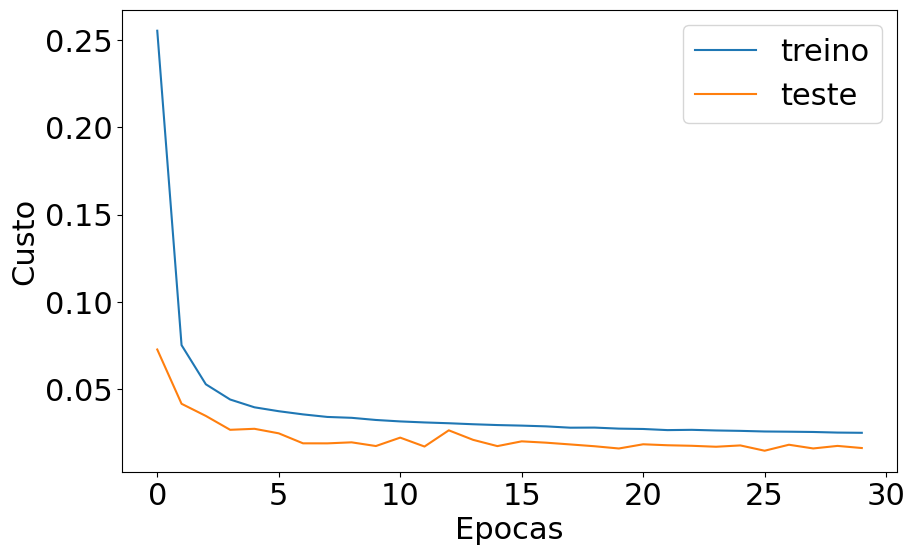

In [149]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')